In [6]:
#Importer les modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Agrandir les figures
# plt.rcParams['figure.figsize'] = (15.0, 10.0)   
# plt.rcParams['font.family'] = "serif"


In [7]:
path = "C:/Users/ayman/Downloads/Nat_Gas.csv"
db = pd.read_csv (path)
display(db)

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


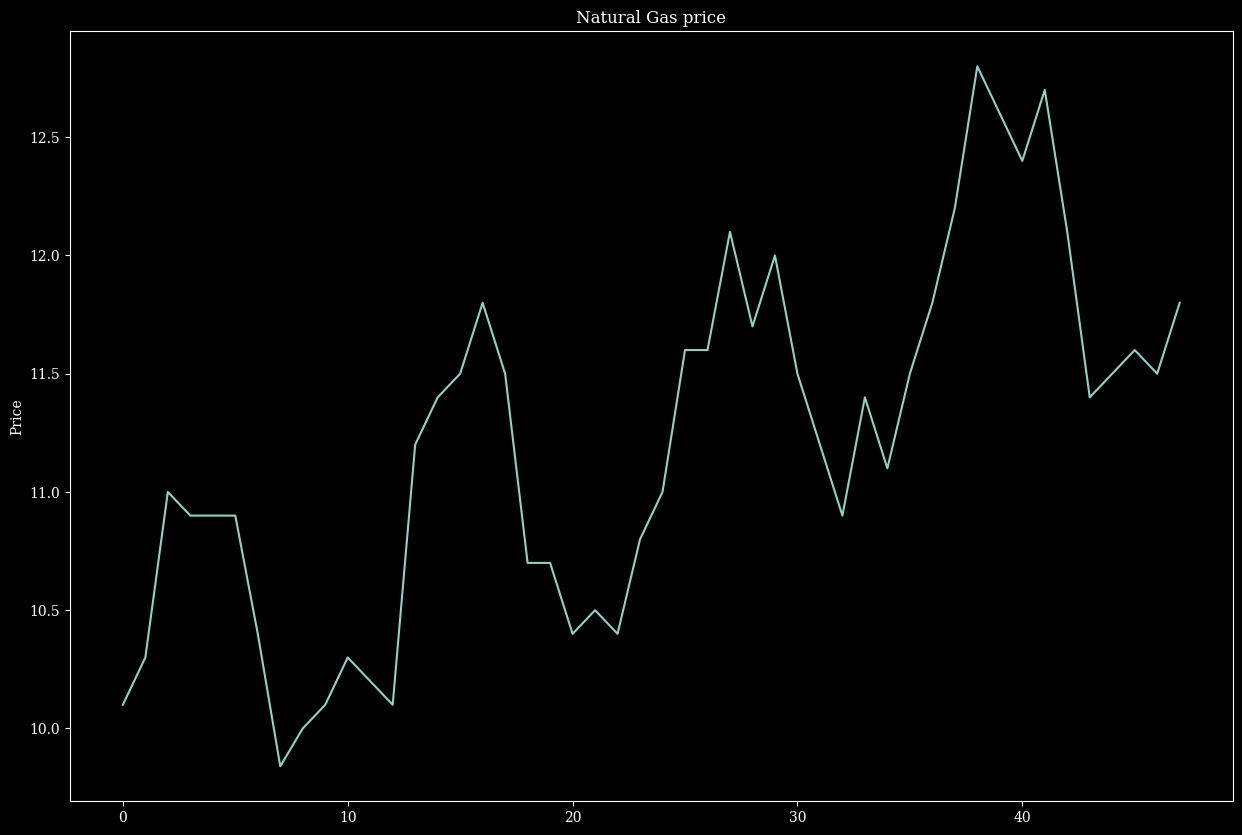

In [9]:
plt.plot(db['Prices'])
plt.ylabel ('Price')
plt.title ('Natural Gas price')
plt.show()

In [10]:
# Séparation des données
date_separation= '5/31/23'
index_separation = db[db['Dates'] == date_separation].index[0]
train_data = db.iloc[:index_separation + 1]
test_data = db.iloc[index_separation + 1:]


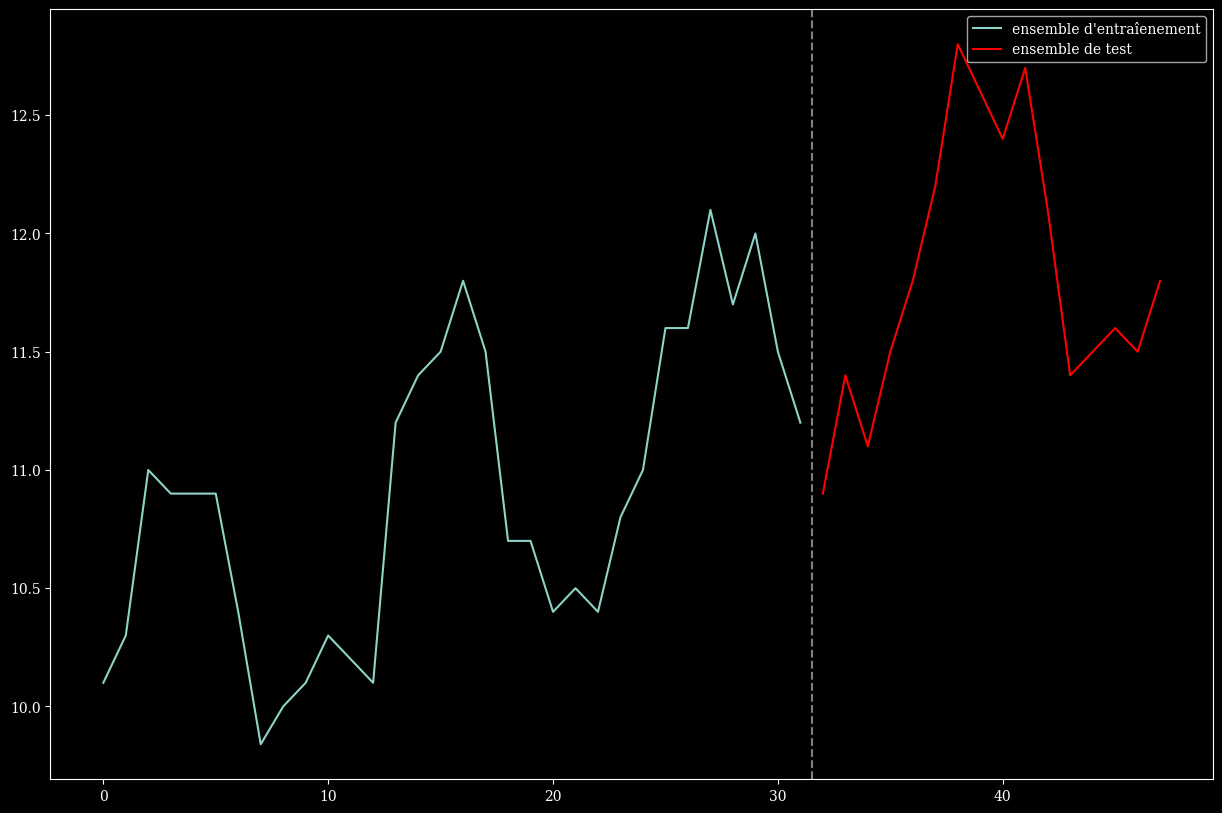

In [11]:
# Plot l'ensembles d'entraînement et l'ensemble de test
plt.plot(train_data['Prices'],label = 'ensemble d\'entraîenement')
plt.plot(test_data['Prices'], color = 'red', label = 'ensemble de test')
separator = index_separation + 0.5  # Position du séparateur (ajustement de la position)
plt.axvline(separator, color='gray', linestyle='--')
plt.legend()
plt.show()


In [12]:
features = db.copy()
features['Dates'] = pd.to_datetime(db['Dates'])
features ['moving_average'] = features['Prices'].rolling(window=3).mean()
features ['Return'] = features['Prices'].pct_change()
features['logreturn'] = np.log(1+ features['Return'])


features.dropna(inplace=True)
features

    
     
     

,Dates,Prices,moving_average,Return,logreturn
2,2020-12-31,11.00,10.466667,0.067961,0.065751
3,2021-01-31,10.90,10.733333,-0.009091,-0.009132
4,2021-02-28,10.90,10.933333,0.000000,0.000000
5,2021-03-31,10.90,10.900000,0.000000,0.000000
6,2021-04-30,10.40,10.733333,-0.045872,-0.046957
7,2021-05-31,9.84,10.380000,-0.053846,-0.055350
8,2021-06-30,10.00,10.080000,0.016260,0.016129
9,2021-07-31,10.10,9.980000,0.010000,0.009950
10,2021-08-31,10.30,10.133333,0.019802,0.019608
11,2021-09-30,10.20,10.200000,-0.009709,-0.009756


In [13]:
# Séparation des données
date_separation= '5/31/23'
index_separation = features[features['Dates'] == date_separation].index[0]
train_data = features.iloc[:index_separation ]
test_data = features.iloc[index_separation :]


In [14]:
FEATURES = ['moving_average', 'Return', 'logreturn']
TARGET = 'Prices'

X_train = train_data[FEATURES]
y_train = train_data[TARGET]

X_test = test_data[FEATURES]
y_test = test_data[TARGET]


C:\Users\ayman\AppData\Local\Temp\ipykernel_32836\4018050307.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data ['predictions'] = predicted_labels


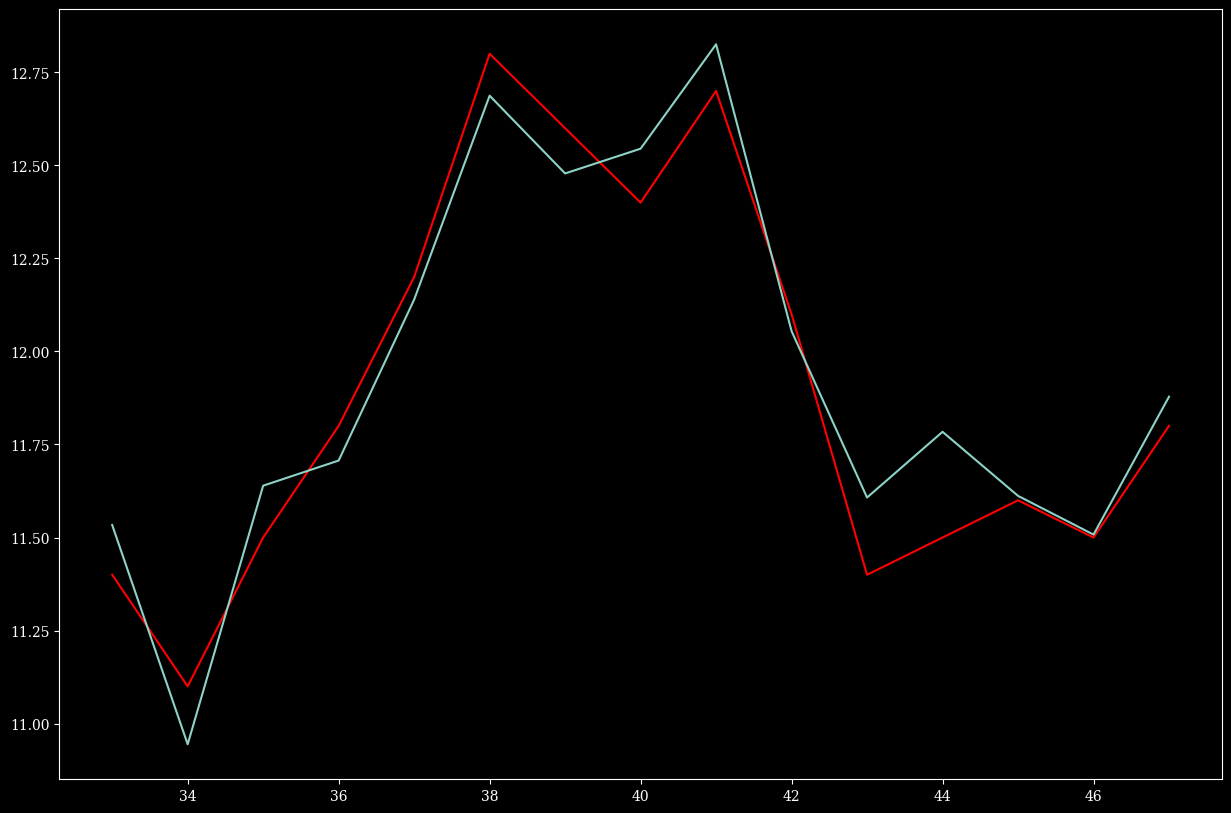

In [15]:

# Régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)
predicted_labels = model.predict(X_test)

# Ajout de la colonne prédictions
test_data ['predictions'] = predicted_labels

# Comparaison entre les valeurs réelles et les valeurs prédites

plt.plot(test_data['Prices'], color ='red')
plt.plot(test_data['predictions'])

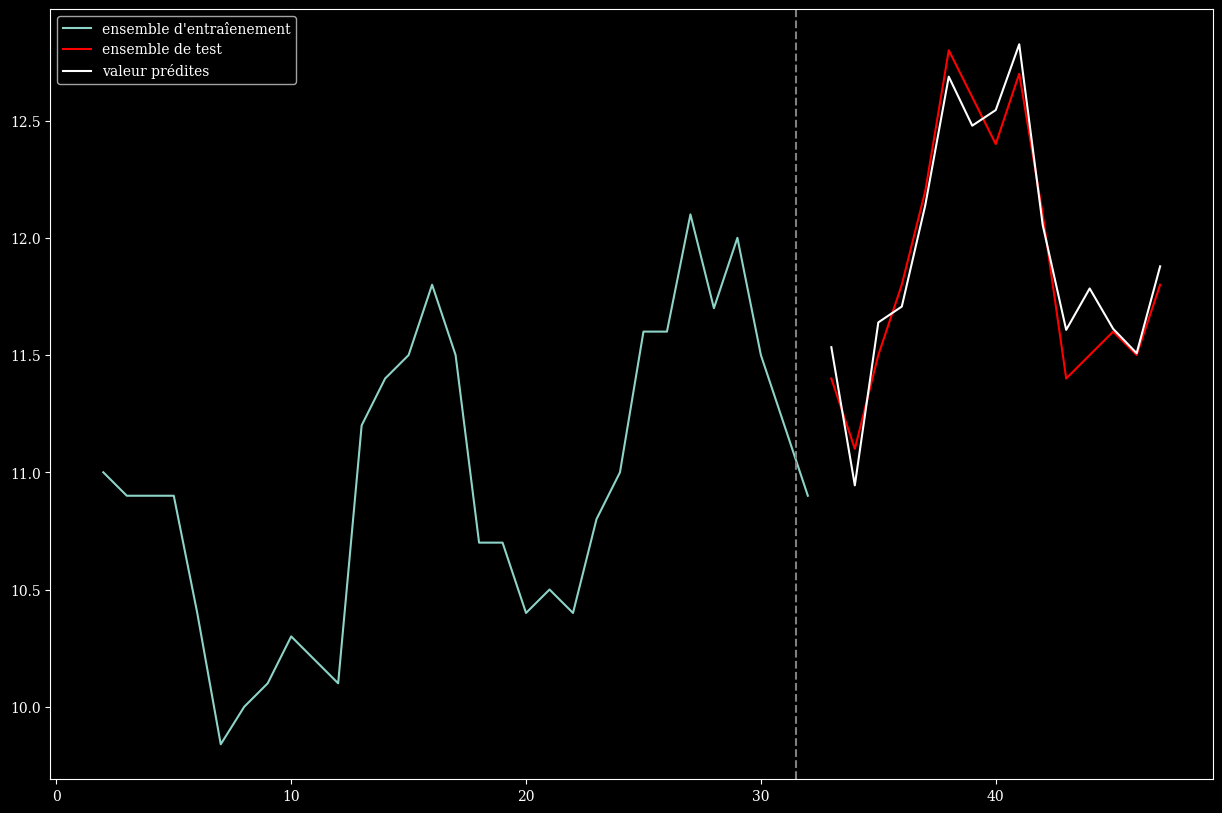

In [16]:
# Plot l'ensembles d'entraînement et l'ensemble de test
plt.plot(train_data['Prices'],label = 'ensemble d\'entraîenement')
plt.plot(test_data['Prices'], color = 'red', label = 'ensemble de test')
plt.plot(test_data['predictions'], color = 'white', label = 'valeur prédites')
separator = index_separation + 0.5  # Position du séparateur (ajustement de la position)
plt.axvline(separator, color='gray', linestyle='--')
plt.legend()
plt.show()

In [17]:
# Évaluation de la performance du modèle

mse = mean_squared_error(y_test, predicted_labels)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, predicted_labels)
print("R2 Score:", r2)


Mean Squared Error: 0.01801362593765227
R2 Score: 0.9332718828453777


In [ ]:

# Correction

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta

date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3]

df = pd.read_csv(path, parse_dates=['Dates'])
prices = df['Prices'].values
dates = df['Dates'].values

# plot prices against dates
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()

# From the plot - we can see the prices have a natural frequency of around a year, but trend upwards. 
# We can do a linear regression to get the trend, and then fit a sin function to the variation in each year.

# First we need the dates in terms of days from the start, to make it easier to interpolate later.
start_date = date(2020,10,31)
end_date = date(2024,9,30)
months = []
year = start_date.year
month = start_date.month + 1
while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1
        
days_from_start = [(day - start_date ).days for day in months]

# Simple regression for the trend will fit to a model y = Ax + B. The estimator for the slope is given by \hat{A} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}, 
# and that for the intercept by \hat{B} = \bar{y} - hat{A} * \xbar

def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar))/ np.sum((x - xbar)**2)
    intercept = ybar - slope*xbar
    return slope, intercept

time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

# Plot linear trend
plt.plot(time, prices)
plt.plot(time, time * slope + intercept)
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.show()
print(slope, intercept)
# From this plot we see the linear trend has been captured. Now to fit the intra-year variation. 
# Given that natural gas is used more in winter, and less in summer, we can guess the frequency of the price movements to be about a year, or 12 months.
# Therefore we have a model y = Asin( kt + z ) with a known frequency.Rewriting y = Acos(z)sin(kt) + Asin(z)cos(kt), 
# we can use bilinear regression, with no intercept, to solve for u = Acos(z), w = Asin(z)

sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / (365))
cos_time = np.cos(time * 2 * np.pi / (365))

def bilinear_regression(y, x1, x2):
    # Bilinear regression without an intercept amounts to projection onto the x-vectors
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2)
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2)
    return(slope1, slope2)

slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)

# We now recover the original amplitude and phase shift as A = slope1 ** 2 + slope2 ** 2, z = tan^{-1}(slope2/slope1)
amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)

# Plot smoothed estimate of full dataset
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift))
plt.plot(time, sin_prices)
plt.title('Smoothed Estimate of Monthly Input Prices')

# Define the interpolation/extrapolation function
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        # Exact match found in the data
        return prices[days_from_start.index(days)]
    else:
        # Interpolate/extrapolate using the sin/cos model
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

# Create a range of continuous dates from start date to end date
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Plot the smoothed estimate of the full dataset using interpolation
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Smoothed Estimate')

# Fit the monthly input prices to the sine curve
x = np.array(days_from_start)
y = np.array(prices)
fit_amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
fit_shift = np.arctan2(slope2, slope1)
fit_slope, fit_intercept = simple_regression(x, y - fit_amplitude * np.sin(x * 2 * np.pi / 365 + fit_shift))
plt.plot(dates, y, 'o', label='Monthly Input Prices')
plt.plot(continuous_dates, fit_amplitude * np.sin((continuous_dates - pd.Timestamp(start_date)).days * 2 * np.pi / 365 + fit_shift) + (continuous_dates - pd.Timestamp(start_date)).days * fit_slope + fit_intercept, label='Fit to Sine Curve')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.legend()
plt.show()